# Visualising Time Series Data

In the section, we will explore ways to visualise data gathered over time. We will:
- Plot simple time series plots
- Derive variables such as month and year and use them for richer visualisations



In [1]:
# loading libraries and reading the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="white")

# read data
market_df = pd.read_csv("./global_sales_data/market_fact.csv")
customer_df = pd.read_csv("./global_sales_data/cust_dimen.csv")
product_df = pd.read_csv("./global_sales_data/prod_dimen.csv")
shipping_df = pd.read_csv("./global_sales_data/shipping_dimen.csv")
orders_df = pd.read_csv("./global_sales_data/orders_dimen.csv")

## Visualising Simple Time Series Data

Let's say you want to visualise numeric variables such as ```Sales```, ```Profit```, ```Shipping_Cost``` etc. over time. 

In [2]:
market_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


Since the ```Order_Date``` variable is in the orders dataframe, let's merge it.

In [3]:
# merging with the Orders data to get the Date column
df = pd.merge(market_df, orders_df, how='inner', on='Ord_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,27-07-2010,NOT SPECIFIED
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,27-07-2010,NOT SPECIFIED
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,27-07-2010,NOT SPECIFIED
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,07-07-2009,HIGH
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,09-11-2010,MEDIUM


In [4]:
# Now we have the Order_Date in the df
# It is stored as a string (object) currently
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 13 columns):
Ord_id                 8399 non-null object
Prod_id                8399 non-null object
Ship_id                8399 non-null object
Cust_id                8399 non-null object
Sales                  8399 non-null float64
Discount               8399 non-null float64
Order_Quantity         8399 non-null int64
Profit                 8399 non-null float64
Shipping_Cost          8399 non-null float64
Product_Base_Margin    8336 non-null float64
Order_ID               8399 non-null int64
Order_Date             8399 non-null object
Order_Priority         8399 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 918.6+ KB


Since ```Order_Date``` is a string, we need to convert it into a ```datetime``` object. You can do that using ```pd.to_datetime()```. 

In [5]:
# Convert Order_Date to datetime type
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Order_Date is now datetime type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 13 columns):
Ord_id                 8399 non-null object
Prod_id                8399 non-null object
Ship_id                8399 non-null object
Cust_id                8399 non-null object
Sales                  8399 non-null float64
Discount               8399 non-null float64
Order_Quantity         8399 non-null int64
Profit                 8399 non-null float64
Shipping_Cost          8399 non-null float64
Product_Base_Margin    8336 non-null float64
Order_ID               8399 non-null int64
Order_Date             8399 non-null datetime64[ns]
Order_Priority         8399 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 918.6+ KB


Now, since on each day, multiple orders were placed, we need to aggregate ```Sales``` using a metric such as mean, median etc., and then create a time series plot.

We will group by ```Order_Date``` and compute the sum of ```Sales``` on each day.

In [6]:
# aggregating total sales on each day
time_df = df.groupby('Order_Date')['Sales'].sum()
print(time_df.head())

print(type(time_df))

Order_Date
2009-01-01    1052.8400
2009-01-02    5031.9000
2009-01-03    7288.1375
2009-01-04    6188.4245
2009-01-05    2583.3300
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


In [7]:
time_df

Order_Date
2009-01-01     1052.8400
2009-01-02     5031.9000
2009-01-03     7288.1375
2009-01-04     6188.4245
2009-01-05     2583.3300
2009-01-06     9692.6010
2009-01-07    39106.9020
2009-01-08    14562.1800
2009-01-09    20550.6445
2009-01-10    10793.7455
2009-01-11      152.3100
2009-01-12     7282.5000
2009-01-13     1443.3200
2009-01-14    31652.0500
2009-01-15     1238.1100
2009-01-16     5949.0005
2009-01-17    12582.6295
2009-01-18    14521.1400
2009-01-19     5991.2200
2009-01-20     6137.3800
2009-01-21    24975.1500
2009-01-22    50492.2040
2009-01-23     2832.2600
2009-01-24    12056.7200
2009-01-25     1543.5620
2009-01-26    18810.7980
2009-01-27     8518.1915
2009-01-28     1777.4800
2009-01-29    18312.8775
2009-01-30    17713.8700
                 ...    
2012-12-01     8098.5800
2012-12-02     4705.2340
2012-12-03    17665.8735
2012-12-04    14128.1700
2012-12-05    13795.1540
2012-12-06     6681.5600
2012-12-07     2039.5300
2012-12-08    30275.3900
2012-12-09    

We can now create a time-series plot using ```sns.tsplot()```.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


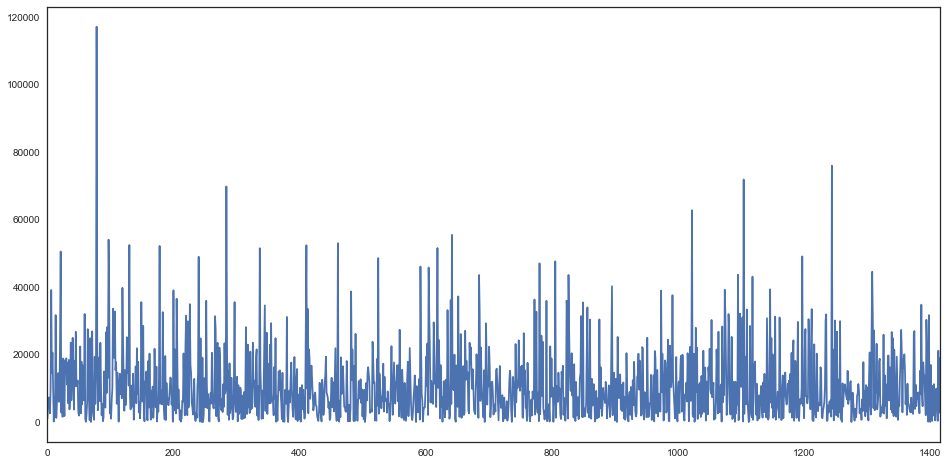

In [8]:
# time series plot

# figure size
plt.figure(figsize=(16, 8))

# tsplot
sns.tsplot(data=time_df)
plt.show()

### Using Derived Date Metrics for Visualisation

It is often helpful to use derived variables from date such as month and year and using them to identify hidden patterns.

In [9]:
# extracting month and year from date

# extract month
df['month'] = df['Order_Date'].dt.month

# extract year
df['year'] = df['Order_Date'].dt.year

df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority,month,year
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,2010-07-27,NOT SPECIFIED,7,2010
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,2010-07-27,NOT SPECIFIED,7,2010
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,2010-07-27,NOT SPECIFIED,7,2010
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,2009-07-07,HIGH,7,2009
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,2010-09-11,MEDIUM,9,2010


Now you can plot the average sales across years and months.

In [10]:
# grouping by year and month
df_time = df.groupby(["year", "month"]).Sales.mean()
df_time.head()


year  month
2009  1        1898.475090
      2        2116.510723
      3        2258.661599
      4        2374.155868
      5        1922.317055
Name: Sales, dtype: float64

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


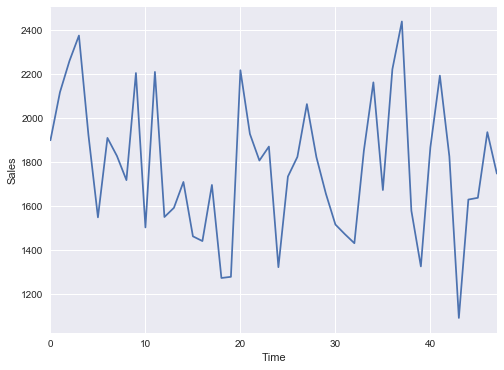

In [20]:
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')
# time series plot
sns.tsplot(df_time)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()

There is another way to visualise numeric variables, such as ```Sales```, across the year and month. We can pivot the ```month``` column to create a wide-format dataframe, and then plot a heatmap.


In [16]:
# Pivoting the data using 'month' 
year_month = pd.pivot_table(df, values='Sales', index='year', columns='month', aggfunc='mean')
year_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2009,1898.475090,2116.510723,2258.661599,2374.155868,1922.317055,1548.093259,1909.084469,1827.095921,1717.295494,2203.961070,1502.192743,2209.047484
2010,1549.664361,1591.532297,1708.934944,1461.935539,1440.393540,1695.397085,1272.653408,1277.917503,2216.599136,1927.250907,1806.324648,1869.720956
2011,1321.671562,1733.378070,1822.860614,2062.716921,1822.033936,1655.599644,1515.576260,1471.700741,1430.616748,1851.404564,2161.479056,1672.187881
2012,2220.831551,2438.166961,1578.284028,1325.253694,1865.744629,2192.228263,1824.935942,1090.950643,1628.963780,1636.951775,1935.183039,1747.047528


You can now create a heatmap using ```sns.heatmap()```.

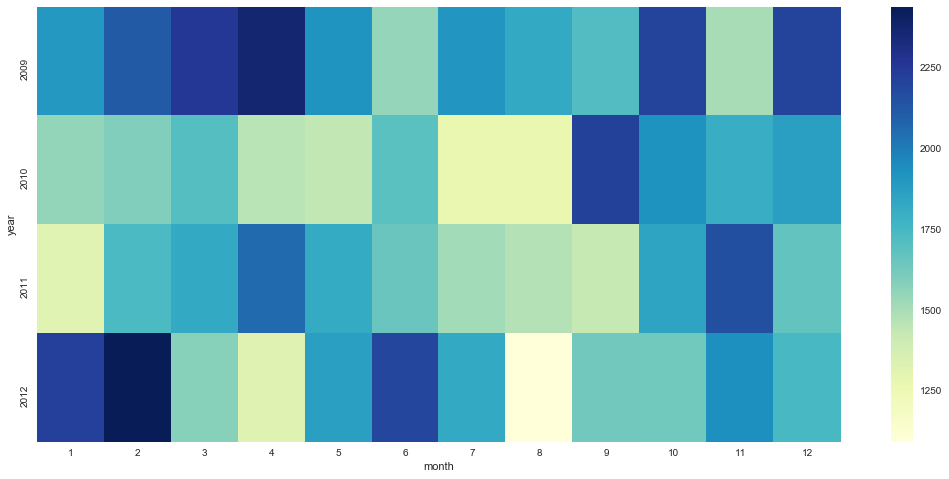

In [23]:
# figure size
plt.figure(figsize=(18, 8))

# heatmap with a color map of choice
sns.heatmap(year_month, cmap="YlGnBu")
plt.show()

### Addtional Reading on Time Series Plots and Heatmaps

1. <A href="https://seaborn.pydata.org/generated/seaborn.heatmap.html">Seaborn heatmaps (documentation)</a>
